<a href="https://colab.research.google.com/github/HikariZasureiya/House-Price-Prediction/blob/main/Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Housing Price Prediction**

##**Modules**

In [57]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, r2_score
from sklearn.compose import ColumnTransformer


##**Load Data**

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/HikariZasureiya/House-Price-Prediction/main/dataset/Housing.csv')
data = data.replace({'yes':1 , 'no':0,'furnished':2, "unfurnished":0, "semi-furnished":1})
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


##**Correlation Heat Chart**

<Axes: >

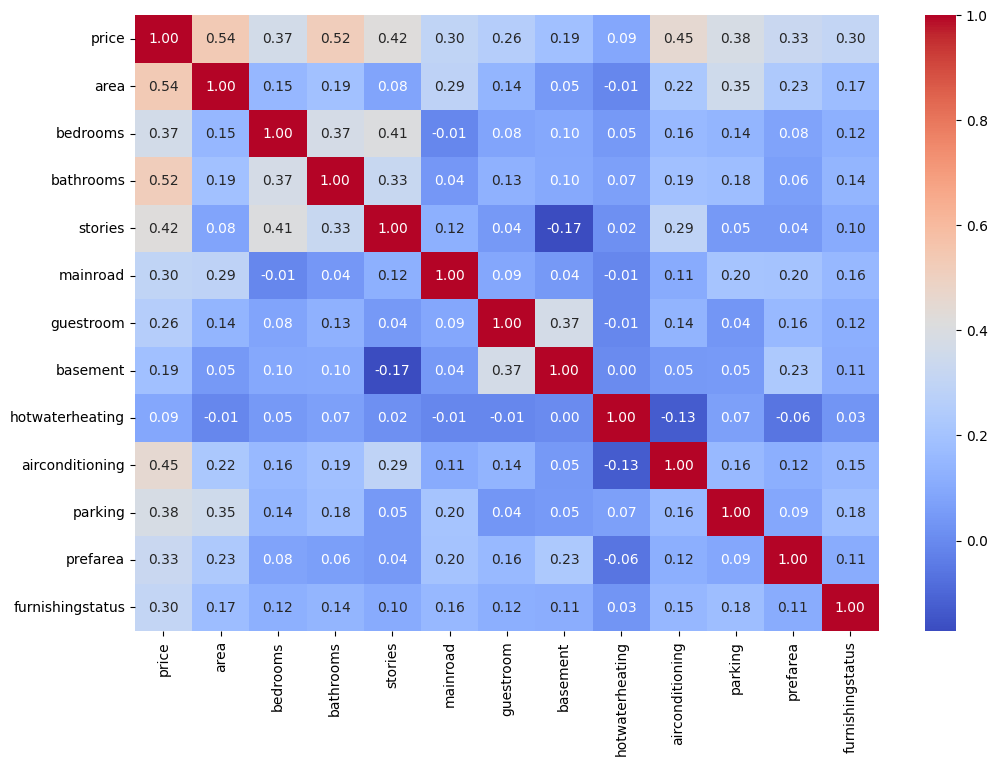

In [59]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

##**Removing Outliers  and applying log transformation**

In [60]:
data = data.dropna()
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
filtered_data = data[(z_scores < 3).all(axis=1)]
filtered_data = filtered_data.apply(lambda z: np.log1p(z))
filtered_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,16.105011,8.999743,1.609438,0.693147,1.098612,0.693147,0.693147,0.693147,0.0,0.693147,1.098612,0.693147,1.098612
9,16.097893,8.657129,1.386294,1.098612,1.609438,0.693147,0.693147,0.000000,0.0,0.693147,0.693147,0.693147,0.000000
12,16.046600,8.787373,1.609438,1.098612,1.098612,0.693147,0.000000,0.000000,0.0,0.693147,0.693147,0.693147,0.693147
14,16.039053,8.962007,1.386294,1.098612,1.098612,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.693147
15,16.023785,8.699681,1.609438,0.693147,1.098612,0.693147,0.000000,0.693147,0.0,0.000000,1.098612,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414348,8.006701,1.098612,0.693147,0.693147,0.693147,0.000000,0.693147,0.0,0.000000,1.098612,0.000000,0.000000
541,14.384879,7.783641,1.386294,0.693147,0.693147,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693147
542,14.375127,8.194506,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
543,14.375127,7.976252,1.386294,0.693147,0.693147,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.098612


In [61]:
y = filtered_data['price']
data = filtered_data.drop(['price','hotwaterheating'], axis=1)
data


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
8,8.999743,1.609438,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,1.098612
9,8.657129,1.386294,1.098612,1.609438,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147,0.000000
12,8.787373,1.609438,1.098612,1.098612,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147
14,8.962007,1.386294,1.098612,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147
15,8.699681,1.609438,0.693147,1.098612,0.693147,0.000000,0.693147,0.000000,1.098612,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
540,8.006701,1.098612,0.693147,0.693147,0.693147,0.000000,0.693147,0.000000,1.098612,0.000000,0.000000
541,7.783641,1.386294,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
542,8.194506,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
543,7.976252,1.386294,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612


##**Splitting Data into training and test**

In [62]:
data_train , data_test , y_train , y_test = train_test_split(data,y,test_size=0.2, random_state=42)

##**Adding Pipeline [Optional]**

In [63]:
# count_dependent = ['bedrooms' , 'bathrooms' , 'stories','parking']
# bin_dependent = ['mainroad' , 'guestroom' , 'basement' , 'hotwaterheating' , 'airconditioning' , 'prefarea']
# cat_dependent = ['furnishingstatus']

# num_pipeline = Pipeline(steps=[('scalar', StandardScaler())])
# cat_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(drop = 'first'))])

# preprocessor = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, count_dependent),
#                                   ('cat_pipeline', cat_pipeline, bin_dependent),
#                                   ('bin_pipelne', cat_pipeline,cat_dependent)])

# reg_model = Pipeline([('preprocessor', preprocessor),
#                       ('regressor', LinearRegression())])


#**Linear Regression Model**

##**use a Test data in the model**

In [64]:
# data_train
models = {"LinearRegression":LinearRegression(),"DecisionTreeRegression":DecisionTreeRegressor(),"RandomForestRegression":RandomForestRegressor(),"SVR":SVR(),"KNN":KNeighborsRegressor()}
for name,model in models.items():
  model.fit(data_train, y_train)
  pred = model.predict(data_test)
  err = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print(f'{name}:  RMSE : {math.sqrt(err)} , r2 : {r2}')

reg_model = LinearRegression()
reg_model.fit(data_train, y_train)

LinearRegression:  RMSE : 0.21676226796722745 , r2 : 0.6960487730869143
DecisionTreeRegression:  RMSE : 0.29991910886713746 , r2 : 0.41810476335099633
RandomForestRegression:  RMSE : 0.2378598749729289 , r2 : 0.634001841222359
SVR:  RMSE : 0.22861192268729377 , r2 : 0.6619084780361626
KNN:  RMSE : 0.2537518308147144 , r2 : 0.5834617416707133


LinearRegression()

In [65]:
predict = reg_model.predict(data_test)
accuracy = reg_model.score(data_test, y_test)

print(accuracy,mean_absolute_percentage_error(y_test, predict))


0.6960487730869143 0.011114571413327784


In [66]:
for k in range(100):
  z = data_test.iloc[[k]]
  gg = reg_model.predict(z)
  print(np.exp(gg),np.exp(y_test.iloc[k]))


[3957871.83842977] 2653001.0
[5791963.09960239] 6300001.000000002
[3686890.27021624] 4445001.000000002
[4653867.66267182] 4900001.000000004
[4600560.3108024] 4382000.999999999
[2942815.26821224] 3010000.9999999986
[4711580.98074772] 5145001.000000004
[5495294.33022033] 6720001.000000003
[3066153.98415662] 3710001.000000003
[6005096.00506587] 8680000.999999993
[6431112.22377162] 5873000.999999996
[4010958.56233713] 4200000.999999997
[3661254.35274881] 3500000.9999999995
[5797992.88869801] 4760000.999999997
[4711362.08473185] 5880000.999999995
[2679219.50244285] 3150000.9999999995
[2977645.73762817] 2660001.0000000023
[6040439.31921808] 7560001.000000001
[7079158.84502837] 5390001.000000003
[2965759.25027209] 2100001.000000001
[3980253.95681398] 4200000.999999997
[4494344.79583526] 4007501.000000002
[2669999.39839196] 1855000.9999999993
[5769433.05787071] 6300001.000000002
[6414122.34751735] 6580001.000000005
[4723860.27874907] 5950001.000000001
[3718569.03349081] 3430000.999999999
[2644